In [2]:
#read data from csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df_train=pd.read_csv('df1_train.csv')
df_test_x=pd.read_csv('df1_test1.csv')
df_test_y=pd.read_csv('df1_test1y.csv')
#turn dataframe into numpy
attributes=df_train.columns.values
# x_train=np.array(df_train[attributes[1:]])
# y_train=np.array(df_train['life_post_consumer'])
# x_test=np.array(df_test_x)
# y_test=np.array(df_test_y['life_post_consumer'])
x_train=df_train[attributes[1:]]
y_train=df_train['life_post_consumer']
x_test=df_test_x
y_test=df_test_y['life_post_consumer']
def rmse(ypred, y):
    return np.sqrt(np.mean((ypred-y)**2))

(400, 43)


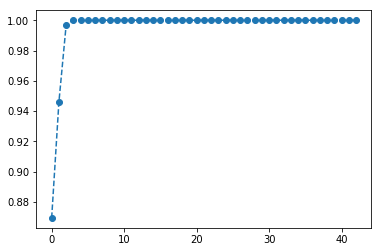

In [3]:
# 把所有的feature都放進去
# 看保留幾個解釋力進步最多的feature
import pandas as pd
from sklearn import preprocessing
print(x_train.shape)
estimator = PCA(n_components=43)
pca_x_train = estimator.fit_transform(x_train)
plt.plot(estimator.explained_variance_ratio_.cumsum(), '--o')
plt.show()

          0
0  0.869358
1  0.076643
2  0.050943
3  0.003050


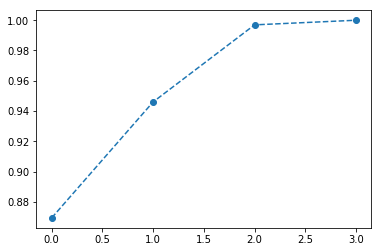

           comp_page_like          Paid  life_post_reach  \
feature-1       -0.028950 -5.647385e-08         0.109400   
feature-2       -0.082370  2.968364e-06         0.961503   
feature-3       -0.996173 -1.363416e-06        -0.081787   
feature-4        0.003741  9.473061e-07         0.238442   

           life_post_impression_liked  life_post_reach_liked   comment  \
feature-1                    0.991073               0.070475  0.000067   
feature-2                   -0.124932               0.230408  0.000172   
feature-3                   -0.018312              -0.024710 -0.000068   
feature-4                    0.042787              -0.969940 -0.000833   

               like     share     type_link   type_status      ...       \
feature-1  0.001104  0.000099 -5.712911e-08  2.512274e-08      ...        
feature-2  0.005593  0.000451  5.937016e-07 -1.399527e-07      ...        
feature-3 -0.001967 -0.000060  7.696208e-07 -2.991518e-06      ...        
feature-4 -0.022638 -0.00198

/Users/hosi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


In [4]:
# 決定降維成4
# 印出feture相對解釋力每個feature相對原本feature的組成
# 把test資料也降維
import pandas as pd
from sklearn import preprocessing
estimator = PCA(n_components=4)
pca_x_train = estimator.fit_transform(x_train)
print(pd.DataFrame(estimator.explained_variance_ratio_))
plt.plot(estimator.explained_variance_ratio_.cumsum(), '--o')
plt.show()
data_scaled = pd.DataFrame(preprocessing.scale(x_train),columns = x_train.columns) 
print(pd.DataFrame(estimator.components_,columns=data_scaled.columns,index = ['feature-1','feature-2','feature-3','feature-4']))
pca_x_test = estimator.transform(x_test)

In [5]:
pca_x_train.shape

(400, 4)

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
ypred = reg.predict(x_test)
print(rmse(ypred, y_test))

692.2891271362012


In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(pca_x_train, y_train)
ypred = reg.predict(pca_x_test)
print(rmse(ypred, y_test))

842.9359344532463
